In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d= pd.read_csv('/content/BostonHousing.csv')
d=d.dropna()
print(d)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [ ]:
y=d['medv']
y=y.dropna()
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64


In [ ]:
x=d.drop('medv',axis=1)
x=x.dropna()
print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

Text(0.5, 1.0, ' Boston Housing ')

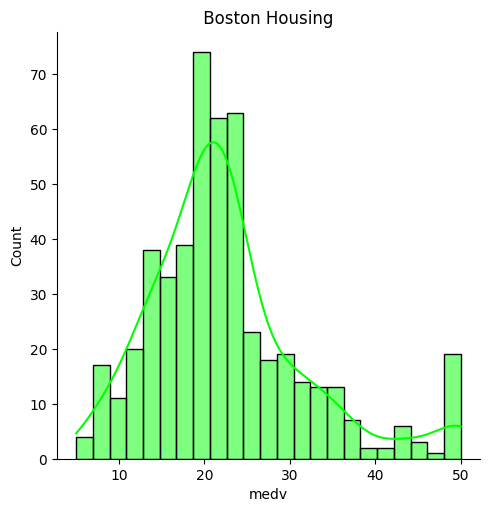

In [ ]:
import seaborn as sns
sns.displot(d.medv,kde=True,color='lime')
plt.title(" Boston Housing ")

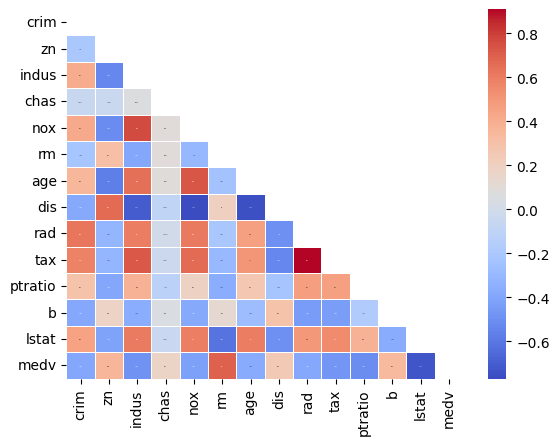

In [ ]:
d = d.replace('ND', np.nan)
d = d.apply(pd.to_numeric, errors='coerce')
matrix = np.triu(d.corr())
sns.heatmap(d.corr(), annot=True, cmap='coolwarm', mask=matrix, annot_kws={'size':1}, linewidth=0.5,linecolor='white')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
train, test = train_test_split(d, test_size=20)
x_train = train.iloc[:, :20]
x_train = x_train.dropna()

x_test = test.iloc[:, :20]
x_test = x_test.dropna()

y_train = train['medv']
y_train = y_train.dropna()

y_test = test['medv']
y_test = y_test.dropna()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

y_train = y_train.values.reshape(-1, 1)
y_train = imputer.fit_transform(y_train).ravel()


print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

(481, 14)
(481,)


LinearRegression()

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)



print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

from sklearn.svm import SVR
model_svr = SVR()


model_svr.fit(x_train, y_train)

y_pred_train = model_svr.predict(x_train)

min_samples_test = min(x_test.shape[0], y_test.shape[0])
x_test = x_test[:min_samples_test]
y_test = y_test[:min_samples_test]

y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

(481, 14)
(481,)
train data MSE score SVR: 66.53679689703381
train data MAE score SVR: 5.274497855067335
train data RMSE score SVR: 8.15700906564617

test data MSE score SVR: 42.74552616822707
test data MAE score SVR: 3.558948145822792
test data RMSE score SVR: 6.538006283893208



In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()

test data MSE score lasso: 0.009305425319101803
test data MAE score lasso: 0.06118290679625256
test data RMSE score lasso: 0.09646463247792843

train data MSE score lasso: 0.014309557584563804
train data MAE score lasso: 0.08675906375438591
train data RMSE score lasso: 0.11962256302455572



In [ ]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [ ]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 1.9039926426228766e-07
train data MAE score ridge: 0.0003044096252014585
train data RMSE score ridge: 0.0004363476415225453

test data MSE score ridge: 2.145387869556201e-07
test data MAE score ridge: 0.00031881890423326455
test data RMSE score ridge: 0.0004631833189522482



In [ ]:
import sklearn.linear_model
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train, y_train)


KNeighborsRegressor()

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor # Changed to KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error # Import mean_squared_error

categorical_cols = x.select_dtypes(include=['object']).columns
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    x[col] = encoders[col].fit_transform(x[col])
model_knn = KNeighborsRegressor(n_neighbors=5) # Changed to KNeighborsRegressor
test_sizes = [0.2, 0.25, 0.3]
for test_size in test_sizes:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
  model_knn.fit(x_train, y_train)
  y_pred_knn = model_knn.predict(x_test)
  # Changed accuracy_score to mean_squared_error for regression
  mse_knn = mean_squared_error(y_test, y_pred_knn)
  print(f"KNN MSE with test size {test_size}: {mse_knn}")

KNN MSE with test size 0.2: 33.67214257425743
KNN MSE with test size 0.25: 36.38856190476191
KNN MSE with test size 0.3: 35.877512582781456


In [ ]:
x_train.shape
y_train.shape

(350,)

In [ ]:
from sklearn.utils import resample
def bootstrap_metrics_knn(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):

        x_train_resampled, y_train_resampled = resample(x_train, y_train)

        model.fit(x_train_resampled, y_train_resampled)

        y_pred = model.predict(x_test)

        mse_values.append(mean_squared_error(y_test, y_pred))
        mae_values.append(mean_absolute_error(y_test, y_pred))
        rmse_values.append(root_mean_squared_error(y_test, y_pred))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

x = x.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
mask = ~np.isnan(y) & ~x.isna().any(axis=1)
x = x[mask]
y = y[mask]

def bootstrap_metrics_knn(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        y_train_resampled = pd.to_numeric(y_train_resampled, errors='coerce')
        mask = ~np.isnan(y_train_resampled)
        x_train_resampled = x_train_resampled[mask]
        y_train_resampled = y_train_resampled[mask]

        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]

        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)
model_knn_regressor = KNeighborsRegressor()

In [ ]:
mse_knn, mae_knn, rmse_knn = bootstrap_metrics_knn(model_knn_regressor, x_train, y_train, x_test, y_test) # Changed to model_knn_regressor

print(f"Bootstrapped MSE for KNN Regression: {mse_knn.mean()}")
print(f"Confidence intervals for KNN Regression MSE: {np.percentile(mse_knn, [2.5, 97.5])}")
print(f"Bootstrapped MAE for KNN Regression: {mae_knn.mean()}")
print(f"Confidence intervals for KNN Regression MAE: {np.percentile(mae_knn, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for KNN Regression: {rmse_knn.mean()}")

Bootstrapped MSE for KNN Regression: 41.423601854304636
Confidence intervals for KNN Regression MSE: [36.39793417 47.61656331]
Bootstrapped MAE for KNN Regression: 4.685867549668874
Confidence intervals for KNN Regression MAE: [4.37913245 5.00062252]
Bootstrapped RMSE for KNN Regression: 6.431135419680757


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def bootstrap_metrics_ridge(model, x_train, y_train, x_test, y_test, n_iterations=1000):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]

        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

In [ ]:
mse_ridge, mae_ridge, rmse_ridge = bootstrap_metrics_ridge(model_ridge, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for Ridge Regression: {mse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MSE: {np.percentile(mse_ridge, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Ridge Regression: {mae_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MAE: {np.percentile(mae_ridge, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Ridge Regression: {rmse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression RMSE: {np.percentile(rmse_ridge, [2.5, 97.5])}")

Bootstrapped MSE for Ridge Regression: 20.154347377859345
Confidence intervals for Ridge Regression MSE: [16.22970139 25.13212026]
Bootstrapped MAE for Ridge Regression: 3.1851215099213688
Confidence intervals for Ridge Regression MAE: [2.81173564 3.61695557]
Bootstrapped RMSE for Ridge Regression: 4.482137984626451
Confidence intervals for Ridge Regression RMSE: [4.02861035 5.01319443]


In [ ]:
# prompt: bootstrap for lasso

def bootstrap_metrics_lasso(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]


        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))


    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

mse_lasso, mae_lasso, rmse_lasso = bootstrap_metrics_lasso(model_lasso, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for Lasso Regression: {mse_lasso.mean()}")
print(f"Confidence intervals for Lasso Regression MSE: {np.percentile(mse_lasso, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Lasso Regression: {mae_lasso.mean()}")
print(f"Confidence intervals for Lasso Regression MAE: {np.percentile(mae_lasso, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Lasso Regression: {rmse_lasso.mean()}")
print(f"Confidence intervals for Lasso Regression RMSE: {np.percentile(rmse_lasso, [2.5, 97.5])}")

Bootstrapped MSE for Lasso Regression: 25.039096092876125
Confidence intervals for Lasso Regression MSE: [20.74498221 29.83906813]
Bootstrapped MAE for Lasso Regression: 3.5910610387786845
Confidence intervals for Lasso Regression MAE: [3.26145091 3.90229869]
Bootstrapped RMSE for Lasso Regression: 4.996362194665993
Confidence intervals for Lasso Regression RMSE: [4.55328992 5.46220894]


In [ ]:
# prompt: bootstrap for ridge

def bootstrap_metrics_ridge(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)


        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]

        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

mse_ridge, mae_ridge, rmse_ridge = bootstrap_metrics_ridge(model_ridge, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for Ridge Regression: {mse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MSE: {np.percentile(mse_ridge, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Ridge Regression: {mae_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MAE: {np.percentile(mae_ridge, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Ridge Regression: {rmse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression RMSE: {np.percentile(rmse_ridge, [2.5, 97.5])}")

Bootstrapped MSE for Ridge Regression: 20.182027991623492
Confidence intervals for Ridge Regression MSE: [16.13803685 24.48139266]
Bootstrapped MAE for Ridge Regression: 3.1938250978307146
Confidence intervals for Ridge Regression MAE: [2.88450337 3.52159089]
Bootstrapped RMSE for Ridge Regression: 4.484323993777247
Confidence intervals for Ridge Regression RMSE: [4.0164502 4.9466394]


In [ ]:
# prompt: bootstrap for svm

from sklearn.svm import SVR
def bootstrap_metrics_svr(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]

        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

model_svr = SVR()
mse_svr, mae_svr, rmse_svr = bootstrap_metrics_svr(model_svr, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for SVR: {mse_svr.mean()}")
print(f"Confidence intervals for SVR MSE: {np.percentile(mse_svr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for SVR: {mae_svr.mean()}")
print(f"Confidence intervals for SVR MAE: {np.percentile(mae_svr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for SVR: {rmse_svr.mean()}")
print(f"Confidence intervals for SVR RMSE: {np.percentile(rmse_svr, [2.5, 97.5])}")

Bootstrapped MSE for SVR: 50.23426324080732
Confidence intervals for SVR MSE: [49.05638083 51.54358901]
Bootstrapped MAE for SVR: 4.982368810470529
Confidence intervals for SVR MAE: [4.86587985 5.09920892]
Bootstrapped RMSE for SVR: 7.087368272546103
Confidence intervals for SVR RMSE: [7.00402389 7.17936075]
